## 1- EDA of the dataset.

In [26]:
import pandas as pd
df = pd.read_csv('apple_stock.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [27]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [28]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,76.004968,76.845661,75.213720,76.064199,74.097124,1.380565e+08
std,54.739063,55.389713,54.134658,54.787600,55.248195,8.399674e+07
min,17.684999,17.911785,17.626785,17.849285,15.648315,3.145820e+07
25%,29.592500,29.841249,29.371249,29.707500,27.131330,8.300500e+07
50%,47.507500,47.967499,47.267502,47.599998,45.507229,1.134760e+08
75%,132.145004,133.680000,130.495003,132.029999,130.403320,1.682138e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.065523e+09


In [29]:
df.shape

(2475, 7)

In [30]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
df['Date'].unique()

array(['2014-01-02', '2014-01-03', '2014-01-06', ..., '2023-10-27',
       '2023-10-30', '2023-10-31'], dtype=object)

#### `These dates told us about the data of stockes ranges from January 2014 to October 2023. So we have enough data for analysis of apple stocks for about 100 months.`

In [32]:
df['High'].unique()

array([ 19.89392853,  19.77499962,  19.52857018, ..., 168.96000671,
       171.16999817, 170.8999939 ])

In [33]:
df['Low'].unique()

array([ 19.71500015,  19.30107117,  19.05714226, ..., 166.83000183,
       168.86999512, 167.8999939 ])

In [34]:
df['Close'].unique()

array([ 19.75464249,  19.32071495,  19.42607117, ..., 168.22000122,
       170.28999329, 170.77000427])

In [35]:
df['Adj Close'].unique()

array([ 17.3187294 ,  16.9383049 ,  17.03067589, ..., 167.99867249,
       170.06593323, 170.5453186 ])

In [36]:
df['Volume'].unique()

array([234684800, 392467600, 412610800, ...,  58499100,  51131000,
        44846000])

In [37]:
## The data is totally clean and there are no any anomalies in this data. so, we can move forward to analyse it according to time and dates. 

## Time Series Analysis of Apple stocks

In [38]:
type(df.Date) # Dates are present in the series as a separate column.
## --> we will arrange this data according to the date by making it the index

pandas.core.series.Series

In [39]:
df = pd.read_csv('apple_stock.csv', parse_dates=['Date'], index_col='Date')
df.head(5)
## here we converted the index column to analyse it according to the date frames.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600


In [40]:
df.loc['2014-01-02':'2014-01-31']  # showing the data of January 2014.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.318729,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.938305,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.030676,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.908880,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.015959,258529600
2014-01-09,19.528570,19.530714,19.119642,19.161428,16.798664,279148800
2014-01-10,19.279642,19.314285,18.968214,19.033571,16.686569,304976000
2014-01-13,18.925358,19.375000,18.924286,19.133215,16.773926,378492800
2014-01-14,19.222143,19.526072,19.202143,19.513929,17.107697,332561600


In [41]:
df.loc['2014-01'].High

Date
2014-01-02    19.893929
2014-01-03    19.775000
2014-01-06    19.528570
2014-01-07    19.498571
2014-01-08    19.484285
2014-01-09    19.530714
2014-01-10    19.314285
2014-01-13    19.375000
2014-01-14    19.526072
2014-01-15    20.007143
2014-01-16    19.887501
2014-01-17    19.716785
2014-01-21    19.645357
2014-01-22    19.903214
2014-01-23    19.875000
2014-01-24    19.843571
2014-01-27    19.814285
2014-01-28    18.392857
2014-01-29    18.120358
2014-01-30    18.089287
2014-01-31    17.911785
Name: High, dtype: float64

In [42]:
df.loc['2014-01-02':'2014-01-31'].Close


Date
2014-01-02    19.754642
2014-01-03    19.320715
2014-01-06    19.426071
2014-01-07    19.287144
2014-01-08    19.409286
2014-01-09    19.161428
2014-01-10    19.033571
2014-01-13    19.133215
2014-01-14    19.513929
2014-01-15    19.905714
2014-01-16    19.794643
2014-01-17    19.309643
2014-01-21    19.609644
2014-01-22    19.696787
2014-01-23    19.863571
2014-01-24    19.502501
2014-01-27    19.660713
2014-01-28    18.089287
2014-01-29    17.883928
2014-01-30    17.849285
2014-01-31    17.878571
Name: Close, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

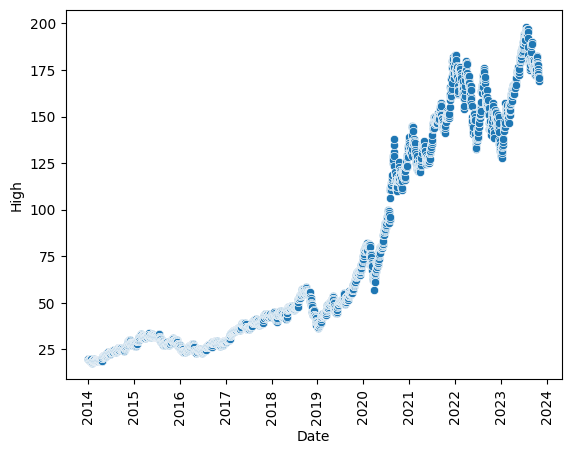

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(df, x='Date', y='High')
plt.xticks(rotation = 90)
plt.show

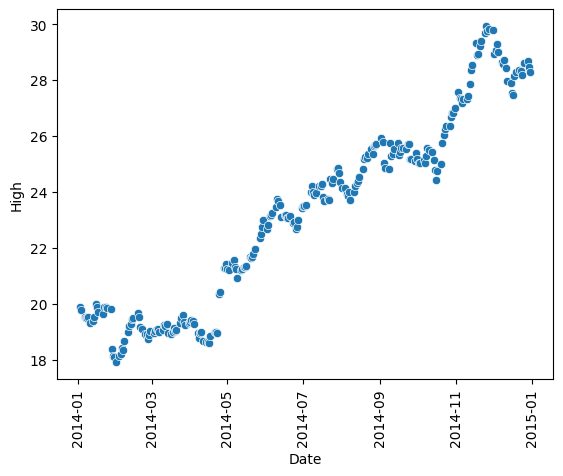

In [47]:
df_2014 = df[df.index.year == 2014]
sns.scatterplot(data=df_2014, x=df_2014.index, y='High')
plt.xticks(rotation=90)
plt.show()

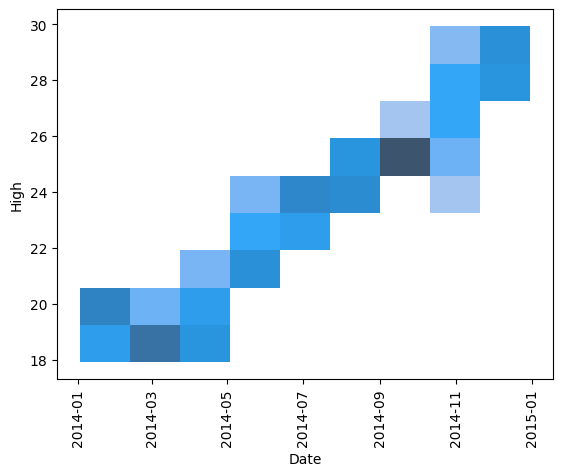

In [49]:
df_2014 = df[df.index.year == 2014]
sns.histplot(data=df_2014, x=df_2014.index, y='High')
plt.xticks(rotation=90)
plt.show()

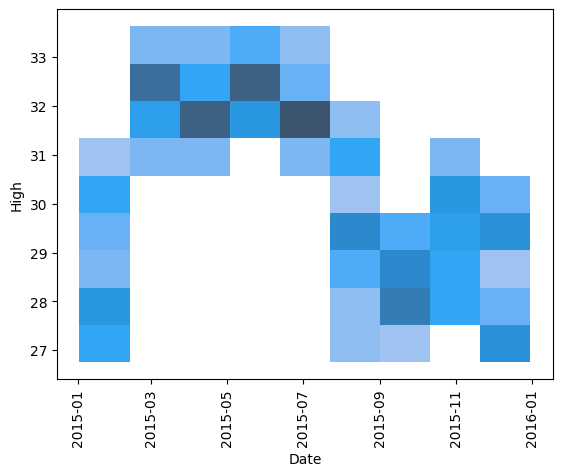

In [50]:
df_2015 = df[df.index.year == 2015]
sns.histplot(data=df_2015, x=df_2015.index , y='High')
plt.xticks(rotation=90)
plt.show()

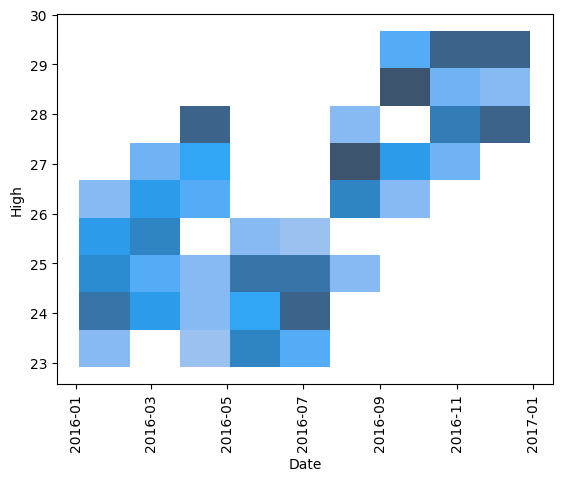

In [51]:
df_2016 = df[df.index.year == 2016]
sns.histplot(data=df_2016, x=df_2016.index , y='High')
plt.xticks(rotation=90)
plt.show()

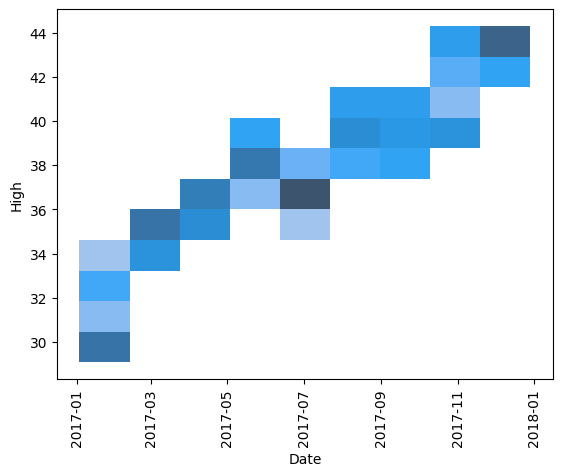

In [52]:
df_2017 = df[df.index.year == 2017]
sns.histplot(data=df_2017, x=df_2017.index , y='High')
plt.xticks(rotation=90)
plt.show()

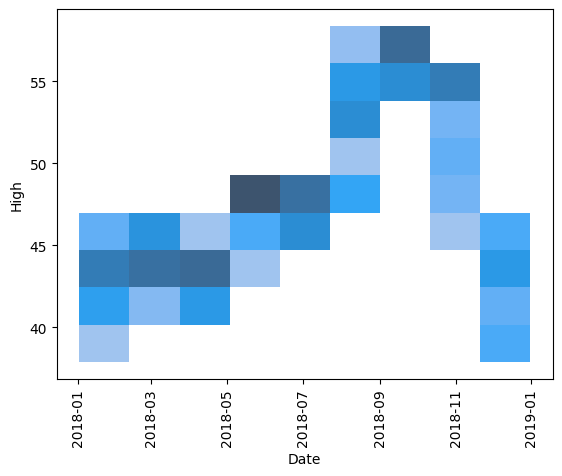

In [53]:
df_2018 = df[df.index.year == 2018]
sns.histplot(data=df_2018, x=df_2018.index , y='High')
plt.xticks(rotation=90)
plt.show()

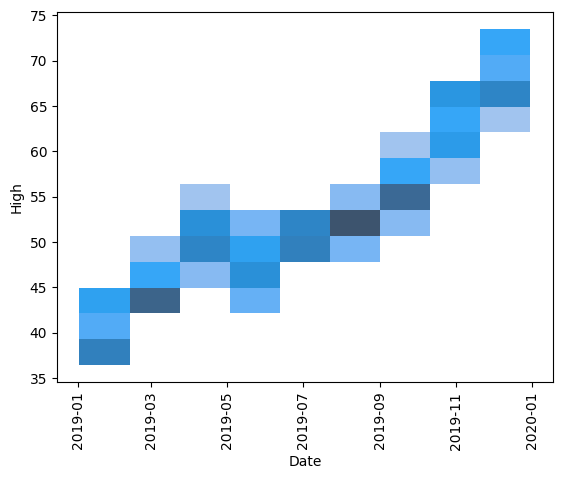

In [54]:
df_2019 = df[df.index.year == 2019]
sns.histplot(data=df_2019, x=df_2019.index , y='High')
plt.xticks(rotation=90)
plt.show()

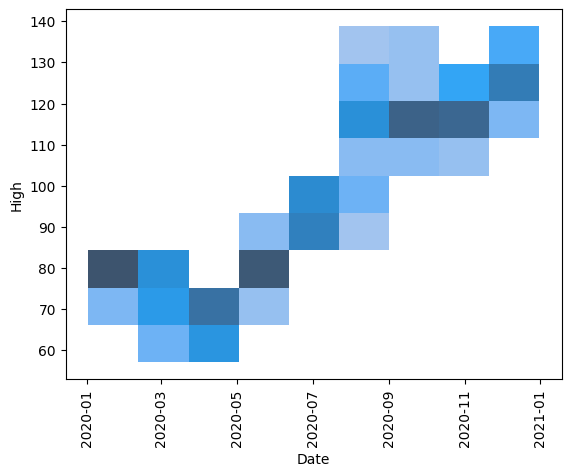

In [55]:
df_2020 = df[df.index.year == 2020]
sns.histplot(data=df_2020, x=df_2020.index , y='High')
plt.xticks(rotation=90)
plt.show()

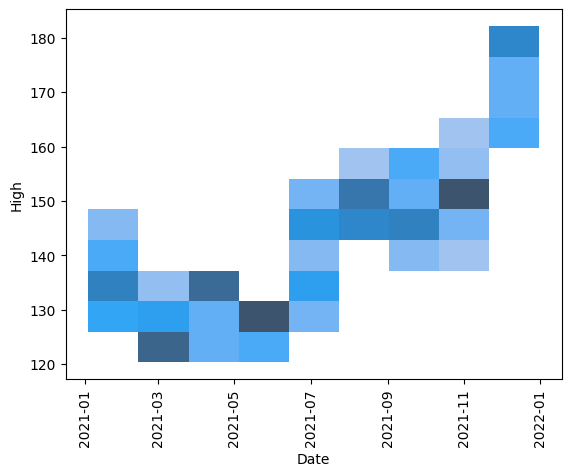

In [56]:
df_2021 = df[df.index.year == 2021]
sns.histplot(data=df_2021, x=df_2021.index , y='High')
plt.xticks(rotation=90)
plt.show()

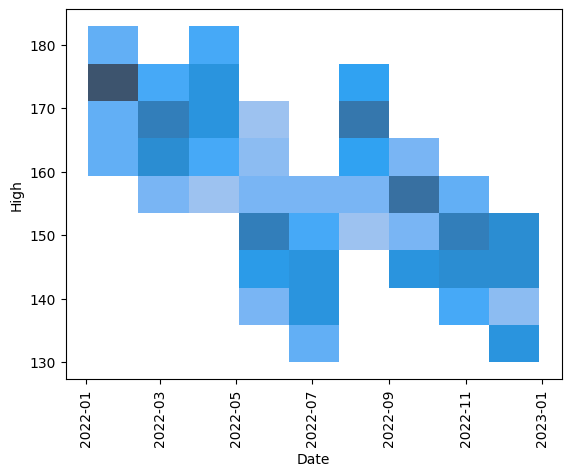

In [57]:
df_2022 = df[df.index.year == 2022]
sns.histplot(data=df_2022, x=df_2022.index , y='High')
plt.xticks(rotation=90)
plt.show()

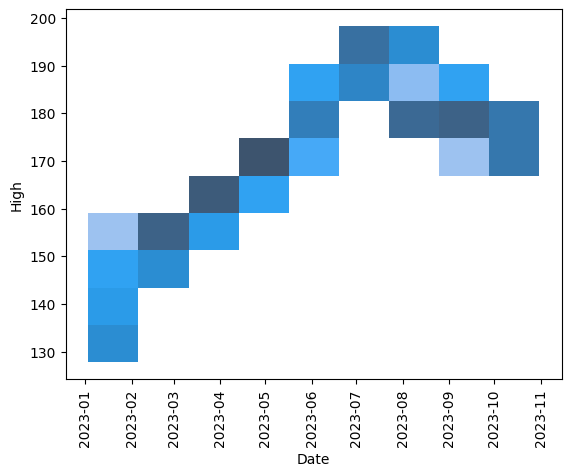

In [58]:
df_2023 = df[df.index.year == 2023]
sns.histplot(data=df_2023, x=df_2023.index , y='High')
plt.xticks(rotation=90)
plt.show()